In [38]:
# predict price?
# Can you describe the vibe of each Seattle neighborhood using listing descriptions?
# What are the busiest times of the year to visit Seattle? By how much do prices spike?
# Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Seattle?

# what kind of listing will get the best rating?
# what kind of listing is the most expensive?

# predict positive / negative comment? sentiment - https://docs.aws.amazon.com/comprehend/latest/dg/how-sentiment.html
# find out the vatiables relationships

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
#import seaborn as sns
%matplotlib inline

In [3]:
# explore calendar data
df_cal = pd.read_csv('./seattle/calendar.csv')
df_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
# explore listing data
df_listings = pd.read_csv('./seattle/listings.csv')
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
# explore reviews data
df_reviews = pd.read_csv('./seattle/reviews.csv')
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [6]:
print('calendar shape:', df_cal.shape)
print('listings shape:', df_listings.shape)
print('reviews shape:', df_reviews.shape)

calendar shape: (1393570, 4)
listings shape: (3818, 92)
reviews shape: (84849, 6)


In [7]:
# check missing data for calendar
np.sum(df_cal.isnull()).sort_values(ascending=False)

price         459028
available          0
date               0
listing_id         0
dtype: int64

In [8]:
# check missing data for listings
np.sum(df_listings.isnull()).sort_values(ascending=False)

license                             3818
square_feet                         3721
monthly_price                       2301
security_deposit                    1952
weekly_price                        1809
notes                               1606
neighborhood_overview               1032
cleaning_fee                        1030
transit                              934
host_about                           859
host_acceptance_rate                 773
review_scores_accuracy               658
review_scores_checkin                658
review_scores_value                  656
review_scores_location               655
review_scores_cleanliness            653
review_scores_communication          651
review_scores_rating                 647
reviews_per_month                    627
first_review                         627
last_review                          627
space                                569
host_response_time                   523
host_response_rate                   523
neighbourhood   

In [9]:
# check missing data for reviews
np.sum(df_reviews.isnull()).sort_values(ascending=False)

comments         17
reviewer_name     0
reviewer_id       0
date              0
id                0
listing_id        0
dtype: int64

In [10]:
#df_listings.hist()

## What are the busiest times of the year to visit Seattle? By how much do prices spike?

In [11]:
# check the busiest period
df_cal['month'] = pd.to_datetime(df_cal['date']).dt.to_period('M')

In [12]:
df_cal.head()

,listing_id,date,available,price,month
0,241032,2016-01-04,t,$85.00,2016-01
1,241032,2016-01-05,t,$85.00,2016-01
2,241032,2016-01-06,f,NaN,2016-01
3,241032,2016-01-07,f,NaN,2016-01
4,241032,2016-01-08,f,NaN,2016-01


In [63]:
# limit the data to 2016 only as there are few record in 2017
df_cal = df_cal[df_cal['date'] < '2017-01-01']

# convert the price to number
df_cal['price'] = df_cal[df_cal['price'].isnull() == False]['price'].apply(lambda x: float(x[1:].replace(',', '')))

In [37]:
# check number of data in the year for a listing_id
df_cal.groupby(['listing_id']).count()['available'].unique()

# we have only 363 days of data, the first 3 days in Jan-2016 is missing

array([363])

In [34]:
# get the availabe = 'f' for each day
df_available_f = df_cal[df_cal['available'] == 'f'].groupby(['month']).count()['listing_id'].reset_index(name="count")
df_available_f.head(12)

,month,count
0,2016-01,47665
1,2016-02,37401
2,2016-03,34420
3,2016-04,38503
4,2016-05,38387
5,2016-06,37296
6,2016-07,44136
7,2016-08,42011
8,2016-09,37294
9,2016-10,35920


In [79]:
# get the availabe = 't' for each day
# https://stackoverflow.com/questions/29836477/pandas-create-new-column-with-count-from-groupby
df_available_t = df_cal[df_cal['available'] == 't'].groupby(['month']).count()['listing_id'].reset_index(name="count")
df_available_t.head(12)

,month,count
0,2016-01,59239
1,2016-02,73321
2,2016-03,83938
3,2016-04,76037
4,2016-05,79971
5,2016-06,77244
6,2016-07,74222
7,2016-08,76347
8,2016-09,77246
9,2016-10,82438


In [27]:
df_cal['listing_id'].nunique()

3818

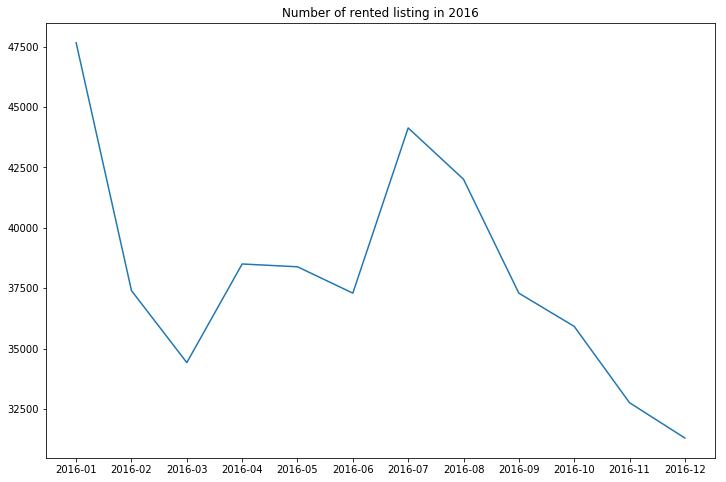

In [81]:
# https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
# https://stackoverflow.com/questions/44100429/plotting-period-series-in-matplotlib-pyplot
x = np.arange(0,len(df_available_f),1)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.plot(x, df_available_f['count'])
ax.set_xticks(x)
ax.set_xticklabels(df_available_f['month'])
plt.title('Number of rented listing in 2016')
plt.show()

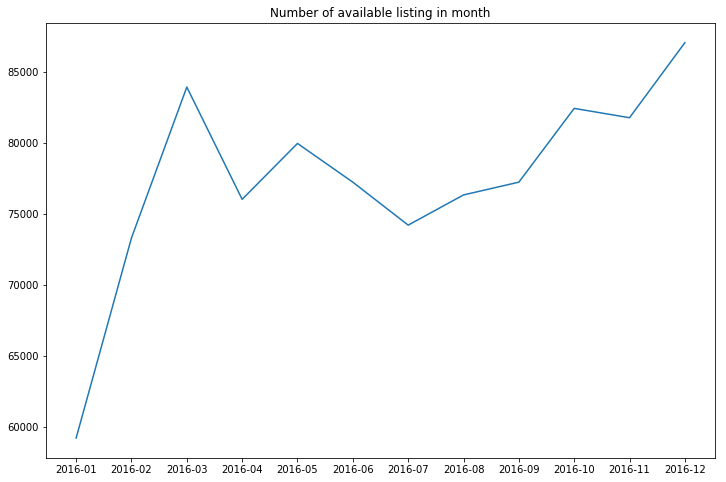

In [30]:
x = np.arange(0,len(df_available_t),1)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.plot(x, df_available_t['count'])
ax.set_xticks(x)
ax.set_xticklabels(df_available_t['month'])
plt.title('Number of available listing in 2016')
plt.show()

In [36]:
df_available_t['count'] + df_available_f['count']

0     106904
1     110722
2     118358
3     114540
4     118358
5     114540
6     118358
7     118358
8     114540
9     118358
10    114540
11    118358
Name: count, dtype: int64

From the charts above, we can see the busiest period in 2016 is Jan-2016 and Jul-2016

## Now the price. Plot some charts on the price changs during the year

In [90]:
# average price by month
df_month_price = df_cal.groupby(['month']).mean()['price'].reset_index(name="avg_price")
df_month_price.head(12)

,month,avg_price
0,2016-01,121.568409
1,2016-02,124.293927
2,2016-03,128.644488
3,2016-04,135.097005
4,2016-05,139.538183
5,2016-06,147.473137
6,2016-07,152.094150
7,2016-08,150.656594
8,2016-09,143.255949
9,2016-10,137.031939


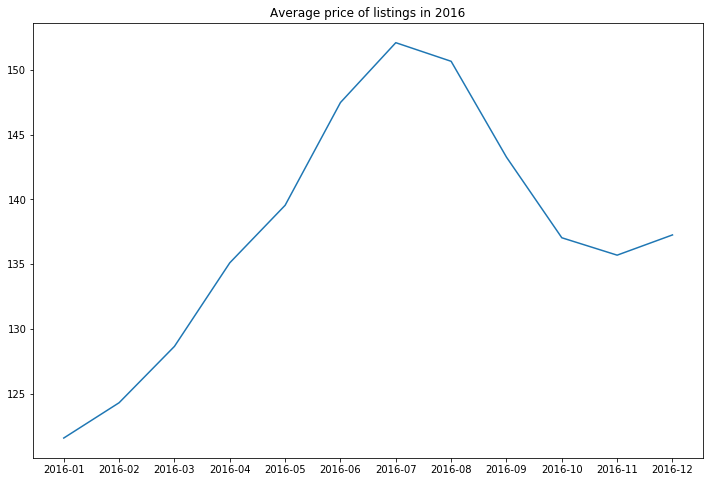

In [72]:
x = np.arange(0,len(df_available_t),1)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.plot(x, df_month_price['avg_price'])
ax.set_xticks(x)
ax.set_xticklabels(df_month_price['month'])
plt.title('Average price of listings in 2016')
plt.show()

In [93]:
# average price by listings
df_month_price = df_cal.groupby(['listing_id']).mean()['price'].reset_index(name="avg_price").sort_values(by='avg_price', ascending=False)
df_month_price.head()

,listing_id,avg_price
977,3308979,1304.816514
2673,7733192,1011.709497
1541,4825073,1000.000000
823,2720963,950.000000
1409,4464824,910.333333


We can see the average price is the highest in Jul-2016

## Any Relationship between Rating and Price?

In [103]:
df_listings.sort_values(by=['review_scores_rating', 'number_of_reviews'], ascending=[False, False])
#df_listings.sort_values(by=['number_of_reviews'], ascending=[False])

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1094,706385,https://www.airbnb.com/rooms/706385,20160104002432,2016-01-04,"Lake Union view ""Sky Cabin"" apt.","The Sky Cabin is a stunning, bright, and beaut...","Welcome to our light and airy ""Sky Cabin"" in t...","The Sky Cabin is a stunning, bright, and beaut...",none,"Eastlake is a very quiet, hidden little neighb...",...,10.0,f,NaN,WASHINGTON,t,strict,f,f,2,4.85
3581,1974131,https://www.airbnb.com/rooms/1974131,20160104002432,2016-01-04,Amazing Studio Apt on Capitol Hill!,"Big, beautiful, comfy studio apartment in a sw...","""Dreampop Studio"" is swanky... and it's big! ...","Big, beautiful, comfy studio apartment in a sw...",none,We are just a block from dozens of quaint and ...,...,10.0,f,NaN,WASHINGTON,t,strict,t,t,1,7.15
2107,5056580,https://www.airbnb.com/rooms/5056580,20160104002432,2016-01-04,Soaring Crane Luxury Garden Retreat,Gorgeous professionally-designed 850 square fo...,Welcome to my professionally designed luxury 8...,Gorgeous professionally-designed 850 square fo...,none,"North Beacon Hill is a very diverse, welcoming...",...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,10.95
2619,948077,https://www.airbnb.com/rooms/948077,20160104002432,2016-01-04,Capitol Hill Stylish Garden Cottage,"Small Space, Big Style, Spectacular Location w...","Small Space, Big Style, Spectacular Location w...","Small Space, Big Style, Spectacular Location w...",none,*The location on the west slope of Capitol Hil...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.28
3715,4871348,https://www.airbnb.com/rooms/4871348,20160104002432,2016-01-04,Private Entrance Bedroom and Bath,"A clean, quiet and comfortable bedroom and bat...",I do a fair amount of business travel and I tr...,"A clean, quiet and comfortable bedroom and bat...",none,The house is a 5 minute car ride North of down...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,6.20
814,4757025,https://www.airbnb.com/rooms/4757025,20160104002432,2016-01-04,Charming and Private-AAA Location,Relax and enjoy your visit to Seattle in t...,This apartment is 1200 square feet and the ent...,Relax and enjoy your visit to Seattle in t...,none,Your location in the Harrison neighborhood i...,...,10.0,f,NaN,WASHINGTON,t,moderate,f,f,1,6.92
895,1826155,https://www.airbnb.com/rooms/1826155,20160104002432,2016-01-04,"Seattle ""Sweet Suite"" Cherry Hill","""Bed Baked and Beyond: Cherry Hill"" is an eleg...","A 1903, Victorian home with plenty of modern c...","""Bed Baked and Beyond: Cherry Hill"" is an eleg...",none,Seattle's Cherry Hill neighborhood still refle...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,5,3.11
864,1772119,https://www.airbnb.com/rooms/1772119,20160104002432,2016-01-04,"Cherry Hill Cozy, Budget Loft-Bed",Our comfy double-bed loft is priced right ...,"Our truly, central home is grand in scale--we ...",Our comfy double-bed loft is priced right ...,none,"One of Seattle's oldest neighborhoods, the Cen...",...,10.0,f,NaN,WASHINGTON,f,strict,f,f,5,2.77
1183,1260259,https://www.airbnb.com/rooms/1260259,20160104002432,2016-01-04,Zen Garden Oasis!,"Cozy, modern home, only steps away from 500+ a...","A modest 450 square feet, but layed out with p...","Cozy, modern home, only steps away from 500+ a...",none,"Magnolia rocks! Head down to ""the village"".. ...",...,10.0,f,NaN,WASHINGTON,f,flexible,f,f,1,2.08
2028,3543247,https://www.airbnb.com/rooms/3543247,20160104002432,2016-01-04,Spa retreat in vibrant Greenwood,Enjoy the experience of this luxurious spa re...,"New, comfortable, filled with high end finishe...",Enjoy the experience of this luxurious spa re...,none,Greenwood is a very walkable neighborhood with...,...,10.0,f,NaN,WASHINGTON,t,moderate,f,f,1,4.00


In [101]:
df_listings[df_listings['id'] == 7733192]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
239,7733192,https://www.airbnb.com/rooms/7733192,20160104002432,2016-01-04,"Luxurious, Modern, Panoramic Views",A Contemporary Retreat with Stunning Views s ...,"Light, big windows, open spaces , views and co...",A Contemporary Retreat with Stunning Views s ...,none,10 minutes walk to the restaurants and shoppin...,...,9.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.67


In [102]:
df_listings.iloc[239]

id                                                                            7733192
listing_url                                      https://www.airbnb.com/rooms/7733192
scrape_id                                                              20160104002432
last_scraped                                                               2016-01-04
name                                               Luxurious, Modern, Panoramic Views
summary                             A  Contemporary Retreat with Stunning Views s ...
space                               Light, big windows, open spaces , views and co...
description                         A  Contemporary Retreat with Stunning Views s ...
experiences_offered                                                              none
neighborhood_overview               10 minutes walk to the restaurants and shoppin...
notes                                                                             NaN
transit                             House is on a bus 

In [106]:
df_listings.groupby('host_neighbourhood').count()['id'].reset_index(name="count")

,host_neighbourhood,count
0,Alki,22
1,Anaheim,7
2,Arbor Heights,3
3,Atlantic,49
4,Baldwin Hills,1
5,Ballard,210
6,Belltown,254
7,Beverly Hills,1
8,Bitter Lake,15
9,Brighton,5
